1- IMPORTAR LIBRERIAS

In [2]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ivan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2- CARGAR DATAFRAME

In [4]:
data = pd.read_parquet("viajes_taxis_g.parquet")
data.head(3)

,passenger_count,trip_distance,payment_type,day_pickup,hour_pickup,year,mes,duracion del viaje,tarifa - peajes
0,1.0,0.44,2.0,1,0,2022,1,1.200000,4.80
1,1.0,2.10,2.0,1,0,2022,1,8.716667,10.80
2,1.0,3.70,1.0,1,0,2022,1,16.200000,23.15


3- VALIDAR TAMANO DEL DATASET

In [5]:
data.shape

(2125317, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125317 entries, 0 to 2125316
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   passenger_count     float64
 1   trip_distance       float64
 2   payment_type        float64
 3   day_pickup          int32  
 4   hour_pickup         int32  
 5   year                int32  
 6   mes                 int32  
 7   duracion del viaje  float64
 8   tarifa - peajes     float64
dtypes: float64(5), int32(4)
memory usage: 113.5 MB


In [9]:
# Filtrar filas donde los años no sean 2008 ni 2009
data = data[~data['year'].isin([2008, 2009])]

# Verificar si las filas se han eliminado correctamente
print(data['year'].unique())

[2022 2021 2023 2024]


4- VALIDAR OUTLIERS EN VARIABLES NUMERICAS

In [10]:
cols_num = ['trip_distance','duracion del viaje','tarifa - peajes']

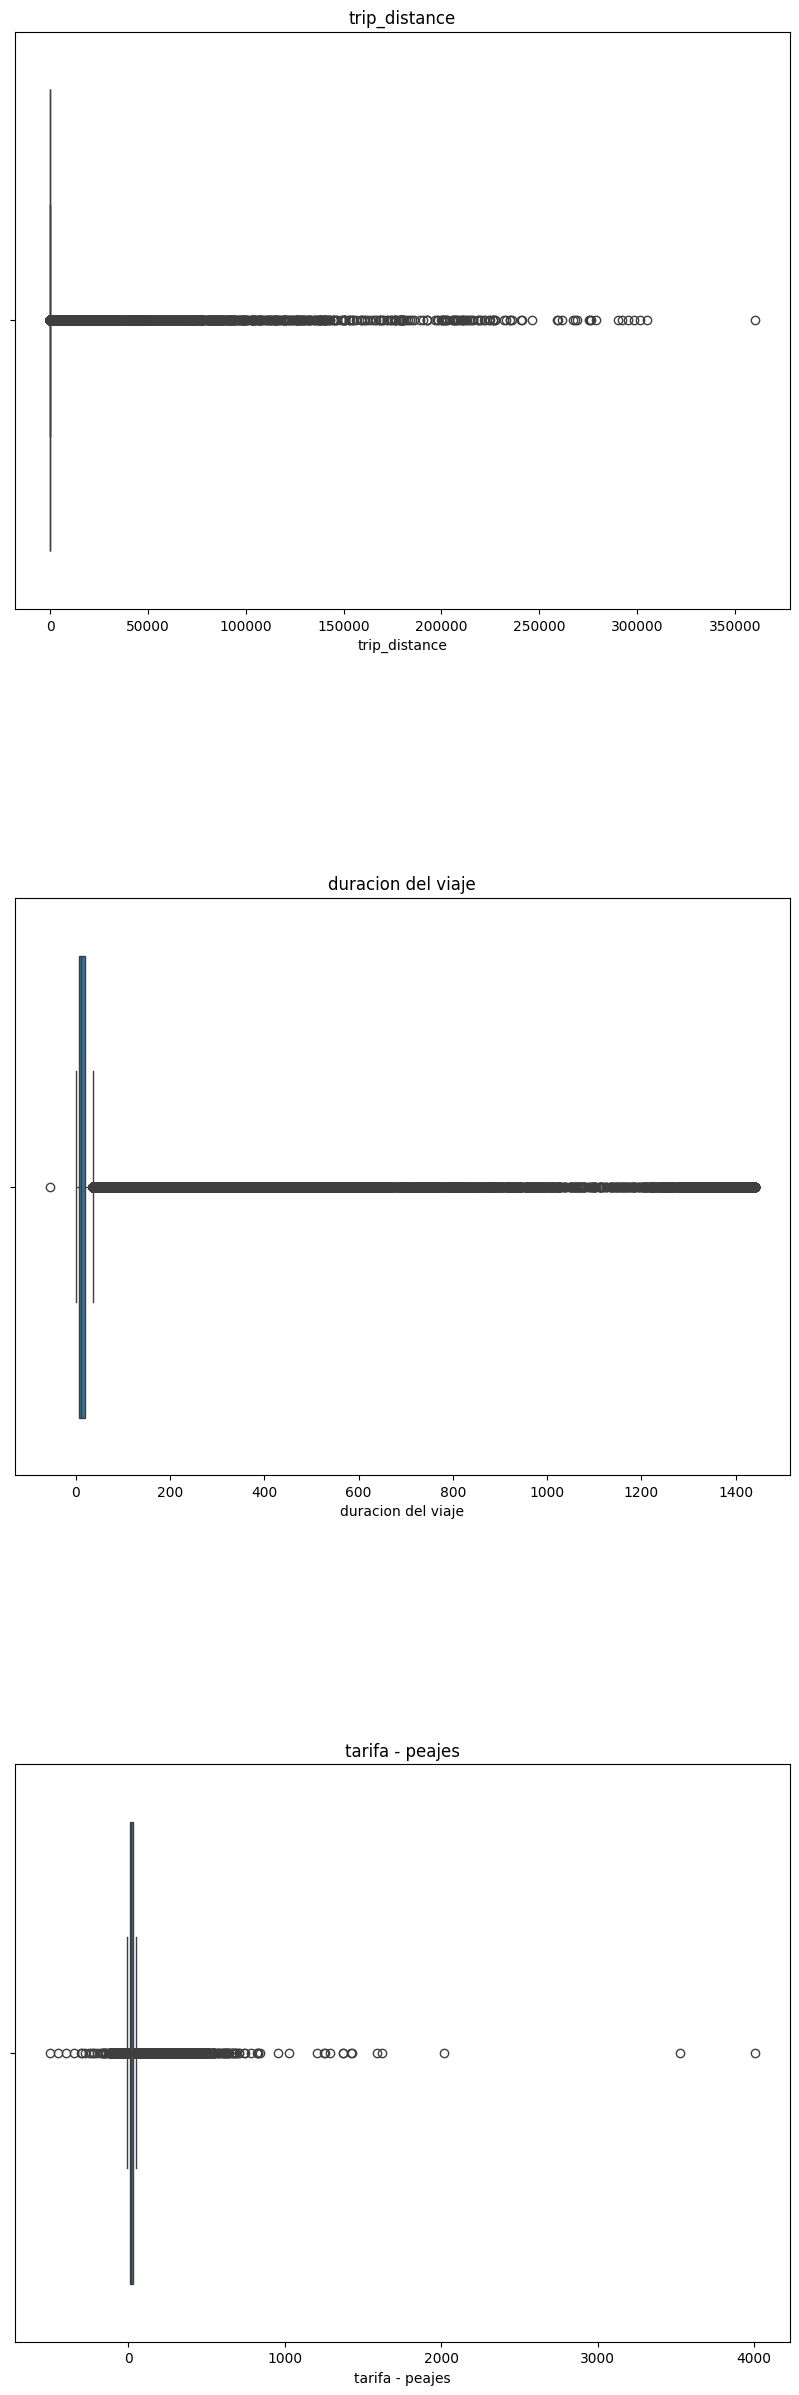

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Comenzamos a validar inicialmente los Outliers en la distancia de los viajes, se observan muchos Outliers alrededor de las 300000 millas, lo cual se ve claramente que son errores de registros,  estableceremos un tope de 27 millas como maximo de recorrido, ademas de que hay muchos 0 en la duracion del viaje

In [12]:
print(data['trip_distance'].nlargest(5))
print(data['trip_distance'].nsmallest(5))

359530    360068.14
702955    305189.98
702034    301385.21
631408    298348.16
631177    295194.47
Name: trip_distance, dtype: float64
29    0.0
60    0.0
61    0.0
76    0.0
79    0.0
Name: trip_distance, dtype: float64


In [13]:
# Contar valores iguales a 0
zeros = (data['trip_distance'] == 0).sum()
# Contar nulos
nulls = data['trip_distance'].isnull().sum()

print(f"Cantidad de ceros: {zeros}")
print(f"Cantidad de nulos: {nulls}")


Cantidad de ceros: 115103
Cantidad de nulos: 0


In [14]:
print(data['trip_distance'].mean())
print(data['trip_distance'].median())

44.41578302357315
1.95


In [15]:
data.iloc[631177]

passenger_count           NaN
trip_distance            2.48
payment_type              NaN
day_pickup              10.00
hour_pickup             10.00
year                  2022.00
mes                      9.00
duracion del viaje      12.00
tarifa - peajes         17.87
Name: 631182, dtype: float64

In [16]:
data.iloc[29]

passenger_count          1.000000
trip_distance            0.000000
payment_type             1.000000
day_pickup               1.000000
hour_pickup              0.000000
year                  2022.000000
mes                      1.000000
duracion del viaje       0.033333
tarifa - peajes         10.300000
Name: 29, dtype: float64

In [17]:
data.iloc[359530]

passenger_count           NaN
trip_distance            2.08
payment_type              NaN
day_pickup              19.00
hour_pickup             23.00
year                  2022.00
mes                      5.00
duracion del viaje      13.00
tarifa - peajes         17.19
Name: 359532, dtype: float64

In [18]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['trip_distance']<=27]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (2125300, 9)
Tamaño del set después de eliminar registros: (2120927, 9)


In [19]:
print(data['trip_distance'].nlargest(5))
print(data['trip_distance'].nsmallest(5))

418442     27.0
1065965    27.0
1326778    27.0
1844527    27.0
2071054    27.0
Name: trip_distance, dtype: float64
29    0.0
60    0.0
61    0.0
76    0.0
79    0.0
Name: trip_distance, dtype: float64


In [20]:
print(data['trip_distance'].mean())
print(data['trip_distance'].median())

2.9175678653720785
1.94


se validan outliers duracion de viajes

In [21]:
print(data['duracion del viaje'].nlargest(5))
print(data['duracion del viaje'].nsmallest(5))

368421     1439.950000
331368     1439.916667
1253223    1439.916667
866805     1439.883333
1836228    1439.866667
Name: duracion del viaje, dtype: float64
716382   -54.016667
590        0.000000
1143       0.000000
1955       0.000000
1965       0.000000
Name: duracion del viaje, dtype: float64


In [22]:
print(data['duracion del viaje'].mean())
print(data['duracion del viaje'].median())

19.5236486530025
12.083333333333334


si observamos los valores mas altos podemos observar que hay tarifas que registran valores como 1439.950000 horas, lo cual son obviamente errores de registros, usando cierta logica vamos a establecer como el tope maximo de duracion de una carrera sean 300 minutos (5 horas)

In [23]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['duracion del viaje']<=300]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (2120927, 9)
Tamaño del set después de eliminar registros: (2113157, 9)


In [24]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['duracion del viaje']>=0]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (2113157, 9)
Tamaño del set después de eliminar registros: (2113156, 9)


In [25]:
print(data['duracion del viaje'].nlargest(5))
print(data['duracion del viaje'].nsmallest(5))

10468      299.800000
1960440    299.616667
624320     299.533333
1965016    299.516667
1831520    299.433333
Name: duracion del viaje, dtype: float64
590     0.0
1143    0.0
1955    0.0
1965    0.0
2088    0.0
Name: duracion del viaje, dtype: float64


In [26]:
print(data['duracion del viaje'].mean())
print(data['duracion del viaje'].median())


15.183224483505557
12.05


TARIFA - PEAJES, esta metrica corresponde al valor de la tarifa menos los peajes pagados en un solo servicio

In [27]:
print(data['tarifa - peajes'].nlargest(5))
print(data['tarifa - peajes'].nsmallest(5))


750580     2021.0
1491556    1025.8
2017228     630.0
1999815     619.8
2069090     534.0
Name: tarifa - peajes, dtype: float64
1403046   -501.00
1841152   -451.00
1424682   -401.00
587496    -350.38
549467    -300.30
Name: tarifa - peajes, dtype: float64


In [28]:
print(data['tarifa - peajes'].mean())
print(data['tarifa - peajes'].median())

21.657393817588492
17.4


Podemos ver unos valores extremos que no corresponden en absoluto con la logica del pago de un serviciode taxi, procederemos a quedarnos con valores inferiores a 1400 USD

In [29]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['tarifa - peajes']<=1400]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (2113156, 9)
Tamaño del set después de eliminar registros: (2113155, 9)


In [30]:
print(f'Tamaño del set antes de eliminar registros: {data.shape}')
data = data[data['tarifa - peajes']>=0]
print(f'Tamaño del set después de eliminar registros: {data.shape}')

Tamaño del set antes de eliminar registros: (2113155, 9)
Tamaño del set después de eliminar registros: (2107042, 9)


In [31]:
print(data['tarifa - peajes'].nlargest(5))
print(data['tarifa - peajes'].nsmallest(5))

1491556    1025.8
2017228     630.0
1999815     619.8
2069090     534.0
1403047     501.0
Name: tarifa - peajes, dtype: float64
1618    0.0
1954    0.0
1955    0.0
3051    0.0
3875    0.0
Name: tarifa - peajes, dtype: float64


In [32]:
print(data['tarifa - peajes'].mean())
print(data['tarifa - peajes'].median())

21.752505441277396
17.46


In [33]:
data.head(2)

,passenger_count,trip_distance,payment_type,day_pickup,hour_pickup,year,mes,duracion del viaje,tarifa - peajes
0,1.0,0.44,2.0,1,0,2022,1,1.200000,4.8
1,1.0,2.10,2.0,1,0,2022,1,8.716667,10.8


In [34]:
data["year"].unique()

array([2022, 2021, 2023, 2024], dtype=int32)

La suma total de 'tarifa - peajes' es: 45833442.57


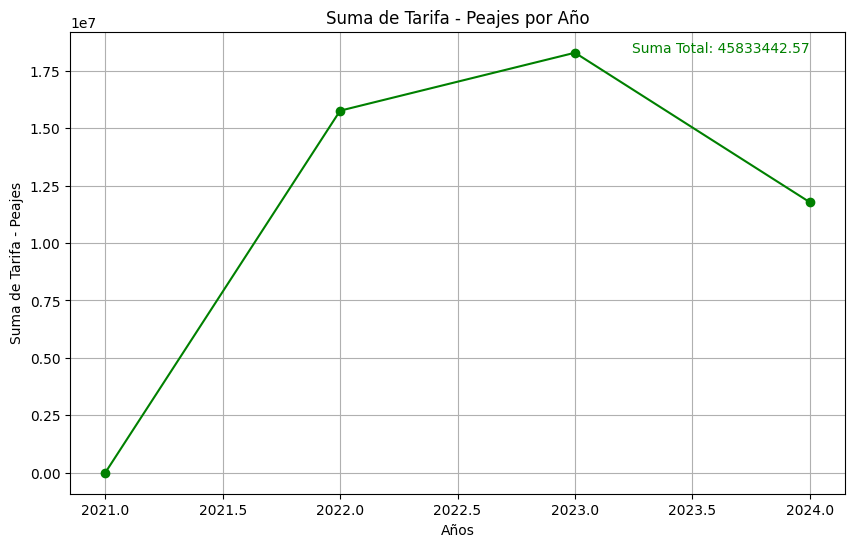

In [36]:
data['year'] = data['year'].astype(int)
data['tarifa - peajes'] = data['tarifa - peajes'].astype(float)

# Sumar todos los valores de la columna 'tarifa - peajes'
suma_total = round(data['tarifa - peajes'].sum(), 3)  

# Agrupar por años y sumar los valores de 'tarifa - peajes'
suma_por_anio = data.groupby('year')['tarifa - peajes'].sum()

print(f"La suma total de 'tarifa - peajes' es: {suma_total}")

# Graficar un gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(suma_por_anio.index, suma_por_anio.values, marker='o', linestyle='-', color='green')
plt.title('Suma de Tarifa - Peajes por Año')
plt.xlabel('Años')
plt.ylabel('Suma de Tarifa - Peajes')
plt.grid(True)

# Mostrar la suma total en el gráfico
plt.text(
    x=suma_por_anio.index.max(), 
    y=suma_por_anio.values.max(), 
    s=f"Suma Total: {suma_total}", 
    fontsize=10, 
    color="green", 
    ha="right"
)

plt.show()


C:\Users\ivan\AppData\Local\Temp\ipykernel_20648\1771310254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['hour_pickup'], palette='viridis')


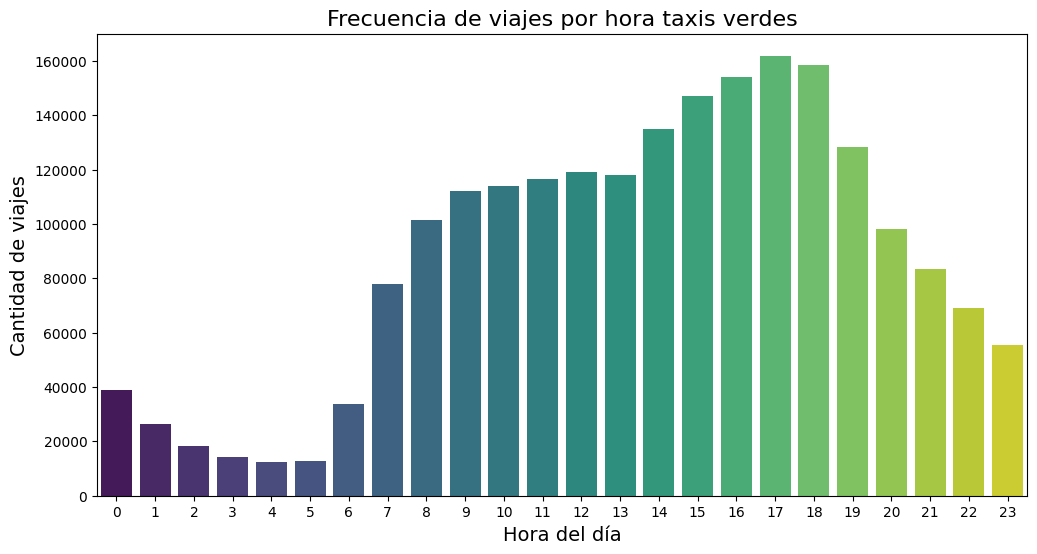

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['hour_pickup'], palette='viridis')
plt.title('Frecuencia de viajes por hora taxis verdes', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Cantidad de viajes', fontsize=14)
plt.xticks(range(0, 24))
plt.show()

C:\Users\ivan\AppData\Local\Temp\ipykernel_20648\3620859720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['day_pickup'], palette='viridis')


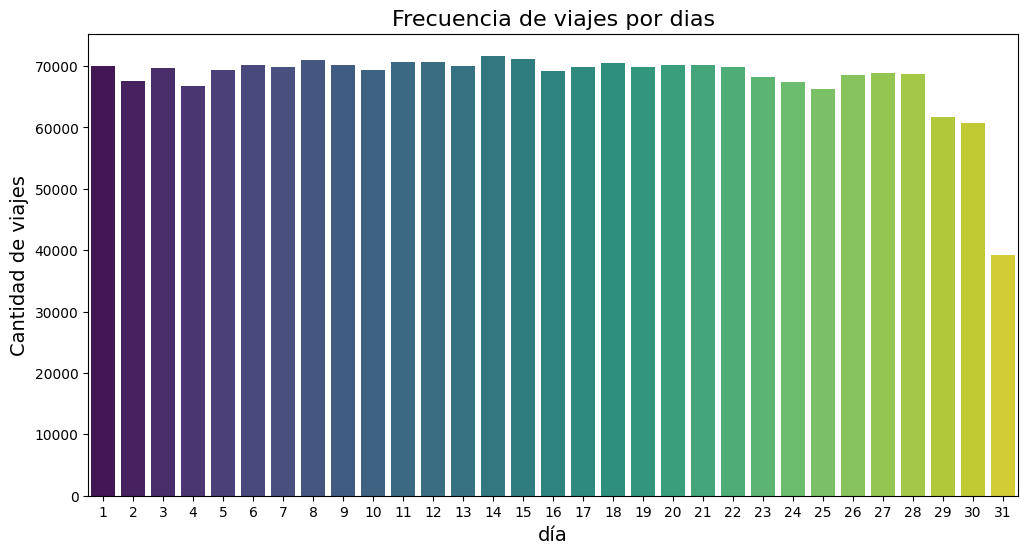

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['day_pickup'], palette='viridis')
plt.title('Frecuencia de viajes por dias', fontsize=16)
plt.xlabel('día', fontsize=14)
plt.ylabel('Cantidad de viajes', fontsize=14)
plt.xticks(range(0, 31))
plt.show()

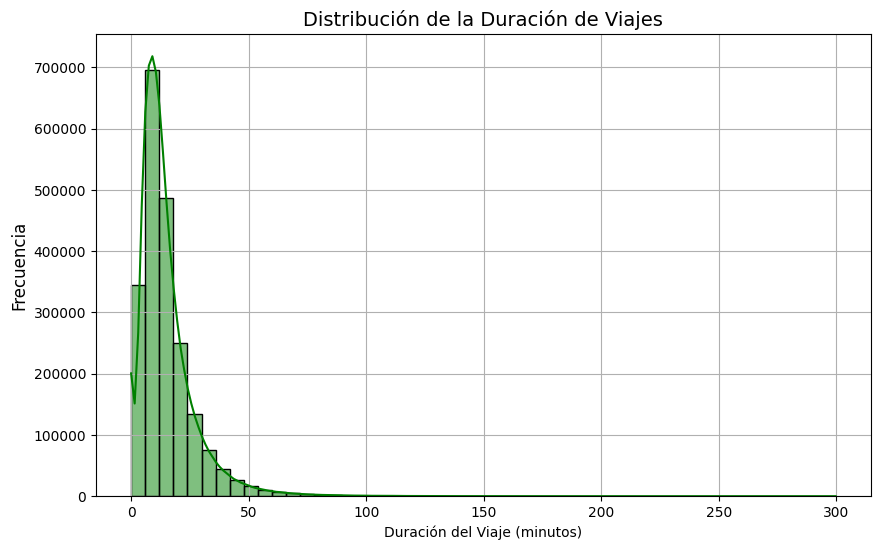

In [39]:

plt.figure(figsize=(10, 6))
sns.histplot(data['duracion del viaje'], bins=50, kde=True, color='green')
plt.title('Distribución de la Duración de Viajes', fontsize=14)
plt.xlabel('Duración del Viaje (minutos)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

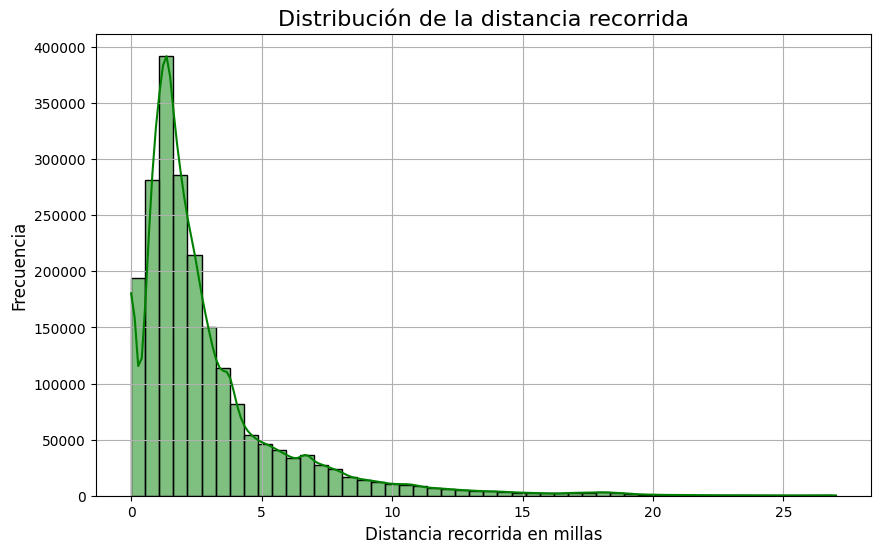

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=50, kde=True, color='green')
plt.title('Distribución de la distancia recorrida', fontsize=16)
plt.xlabel('Distancia recorrida en millas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

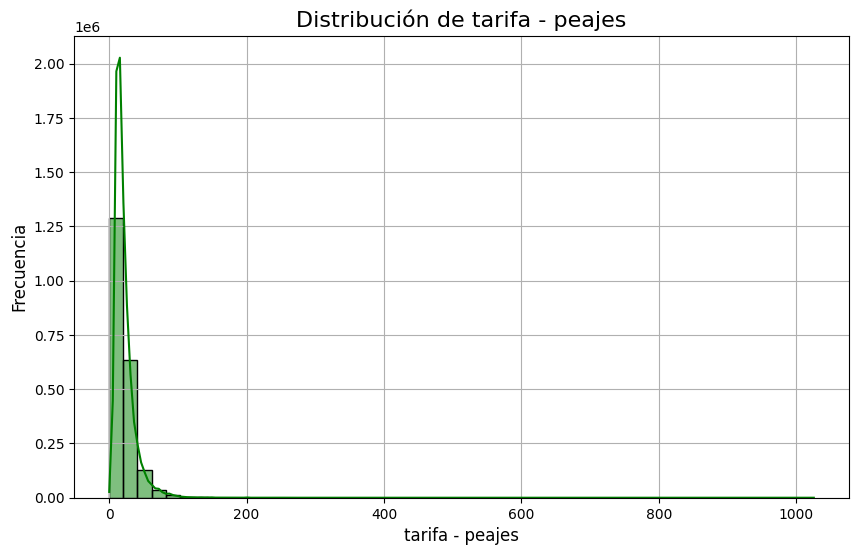

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['tarifa - peajes'], bins=50, kde=True, color='green')
plt.title('Distribución de tarifa - peajes', fontsize=16)
plt.xlabel('tarifa - peajes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

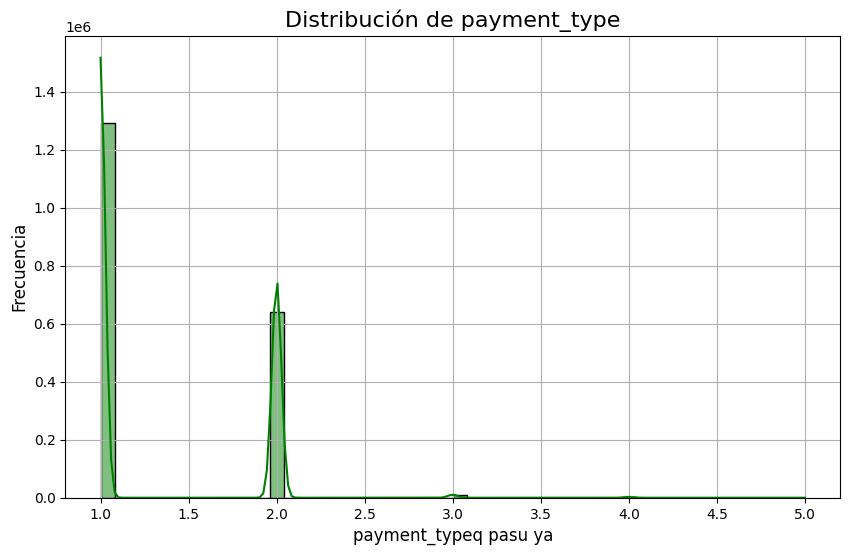

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['payment_type'], bins=50, kde=True, color='green')
plt.title('Distribución de payment_type', fontsize=16)
plt.xlabel('payment_typeq pasu ya', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

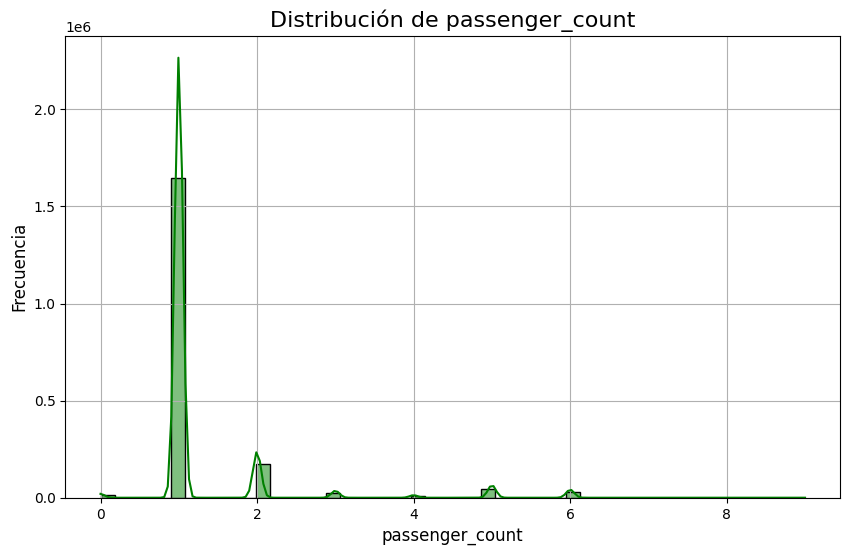

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['passenger_count'], bins=50, kde=True, color='green')
plt.title('Distribución de passenger_count', fontsize=16)
plt.xlabel('passenger_count', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

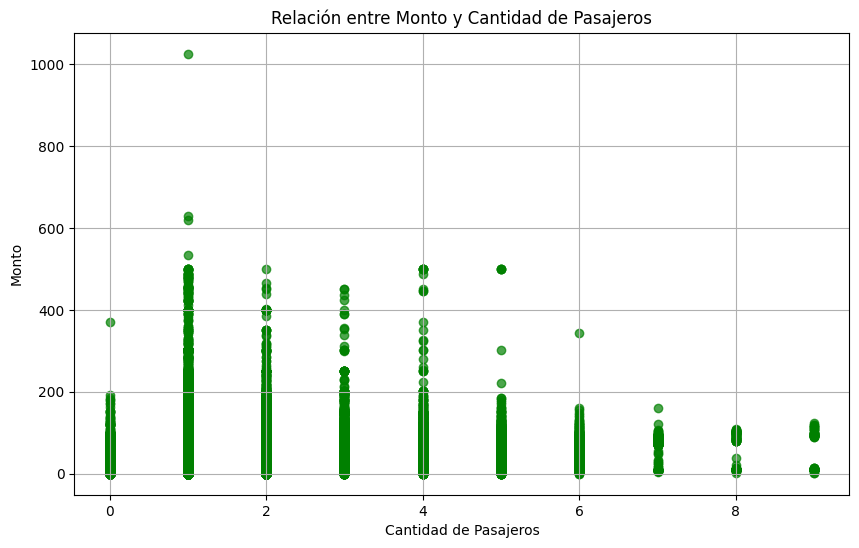

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['passenger_count'], data['tarifa - peajes'], alpha=0.7, color='g')
plt.title('Relación entre Monto y Cantidad de Pasajeros')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Monto')
plt.grid(True)
plt.show()

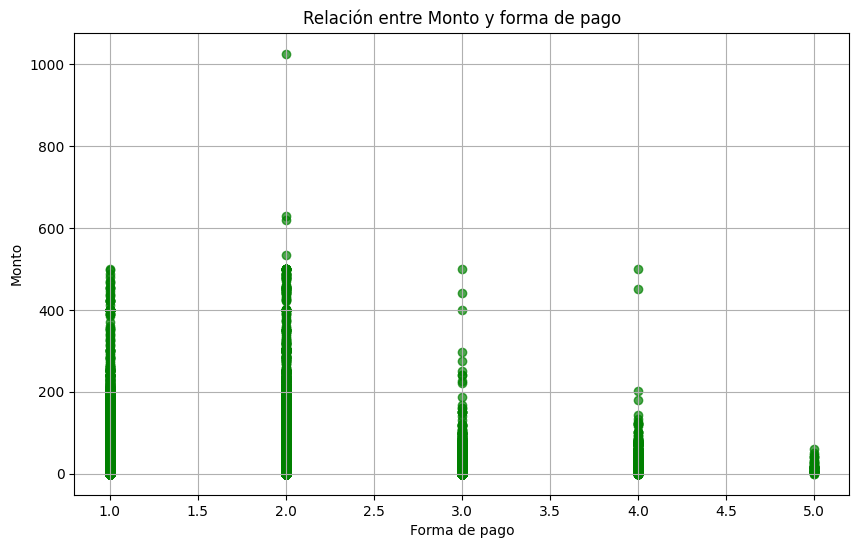

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(data['payment_type'], data['tarifa - peajes'], alpha=0.7, color='g')
plt.title('Relación entre Monto y forma de pago')
plt.xlabel('Forma de pago')
plt.ylabel('Monto')
plt.grid(True)
plt.show()